In [39]:
import numpy as np
import random
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
%matplotlib inline

## A couple of utility functions that might be used later

In [40]:
# a utility function to only show the coefficient section of summary
from IPython.core.display import HTML
def short_summary(est):
    return HTML(est.summary().tables[1].as_html())
        
def dummify(df,column):
    print '{} is your baseline'.format(sorted(df[column].unique())[-1])
    dummy = pd.get_dummies(df[column]).rename(columns=lambda x: column+'_'+str(x)).iloc[:,0:len(df[column].unique())-1]
    df = df.drop(column,axis=1) #Why not inplace? because if we do inplace, it will affect the df directly
    return pd.concat([df,dummy],axis=1)

## First example from class


In [41]:
df_gnp = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df_gnp.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [42]:
X = df_gnp.GNP
X = sm.add_constant(X)
y = df_gnp.Employed 

In [43]:
X1 = df_gnp.GNP
X1 = sm.add_constant(X1)
X2 = df_gnp.GNP
X2 = sm.add_constant(X2)
X2['const'] = X2['const']*2
y = df_gnp.Employed

In [44]:
est1 = sm.OLS(y, X1)
est1 = est1.fit()
est2 = sm.OLS(y, X2)
est2 = est2.fit()
short_summary(est1)

,coef,std err,t,P>|t|,[0.025,0.975]
const,51.8436,0.681,76.087,0.000,50.382,53.305
GNP,0.0348,0.002,20.374,0.000,0.031,0.038


In [45]:
short_summary(est2)

,coef,std err,t,P>|t|,[0.025,0.975]
const,25.9218,0.341,76.087,0.000,25.191,26.652
GNP,0.0348,0.002,20.374,0.000,0.031,0.038


In [46]:
est = sm.OLS(y,X)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Tue, 16 May 2017   Prob (F-statistic):           8.36e-12
Time:                        13:19:43   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
X['const']

1947    1.0
1948    1.0
1949    1.0
1950    1.0
1951    1.0
1952    1.0
1953    1.0
1954    1.0
1955    1.0
1956    1.0
1957    1.0
1958    1.0
1959    1.0
1960    1.0
1961    1.0
1962    1.0
Name: const, dtype: float64

## Let's plot our model and see how well our line fits

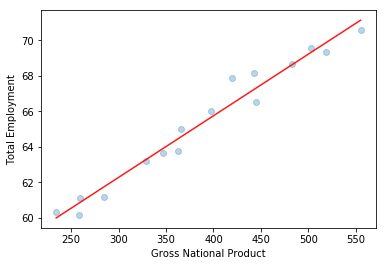

In [48]:
# We pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(X.GNP.min(), X.GNP.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

plt.scatter(X.GNP, y, alpha=0.3)  # Plot the raw data
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red

In [49]:
X_prime.shape

(100, 2)

## Look at the influence of individual points and change a specific point to see its influence

In [50]:
def influence_plotter(y_delta,x_delta,y,X):
    y.ix[9999] = y_delta
    X.loc[9999,'GNP'] = x_delta
    X.loc[9999,'const'] = 1
    est = sm.OLS(y, X)
    est = est.fit()
    est.summary()

    # We pick 100 hundred points equally spaced from the min to the max
    X_prime = np.linspace(X.GNP.min(), X.GNP.max(), 100)[:, np.newaxis]
    X_prime = sm.add_constant(X_prime)  # add constant as we did before
    # Now we calculate the predicted values
    y_hat1 = est.predict(X_prime)

    plt.scatter(X.GNP, y, alpha=0.3)  # Plot the raw data
    plt.scatter(X.GNP[9999],y.ix[9999],alpha=1, color='green')
    plt.xlabel("Gross National Product")
    plt.ylabel("Total Employment")
    plt.plot(X_prime[:, 1], y_hat1, 'g', alpha=0.9)
    plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)
    influence_plot(est)
    est.summary()

/Users/dan/.virtualenvs/linear_regression_lecture/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
/Users/dan/.virtualenvs/linear_regression_lecture/lib/python2.7/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


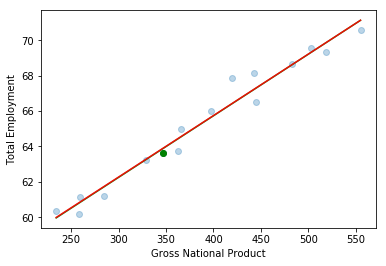

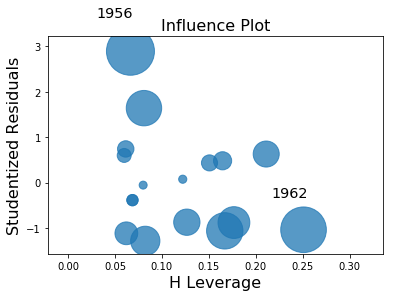

In [51]:
# Let's see what happens to our regression line under different types of outliers
influence_plotter(y.iloc[5],X.iloc[5,1],y,X)

# Start of afternoon lecture

## Examine the credit data set

In [80]:
df_cred = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)
df_cred.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [53]:
df_cred.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


## We can also interact with OLS via formulas (looks familiar to R users)

In [81]:
#Let's fit a simple model using the fancy formulas
est=smf.ols(formula = 'Balance ~ Income + Married',data=df_cred).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     54.52
Date:                Tue, 16 May 2017   Prob (F-statistic):           1.20e-21
Time:                        14:20:31   Log-Likelihood:                -2970.8
No. Observations:                 400   AIC:                             5948.
Df Residuals:                     397   BIC:                             5960.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        258.8819     41.431      6.248      0.000     177.430     340.334
Married[T.Yes]   -20.9546     41.926     -0.500      0.617    -103.379      61.470
Income             6.0587      0.580     10.441      0.000       4.918       7.199
==============================================================================
Omnibus:                       44.240   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.104
Skew:                           0.380   Prob(JB):                     2.61e-05
Kurtosis:                       2.170   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
#Let's fit a simple model using the fancy formulas
est=smf.ols(formula = 'Balance ~ Income + Married + Ethnicity',data=df_cred).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     27.13
Date:                Tue, 16 May 2017   Prob (F-statistic):           6.58e-20
Time:                        14:22:59   Log-Likelihood:                -2970.8
No. Observations:                 400   AIC:                             5952.
Df Residuals:                     395   BIC:                             5972.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                253.2322     53.920      4.696      0.000     147.225     359.239
Married[T.Yes]           -21.5392     42.332     -0.509      0.611    -104.764      61.685
Ethnicity[T.Asian]         5.9666     58.187      0.103      0.918    -108.429     120.363
Ethnicity[T.Caucasian]     8.6562     50.528      0.171      0.864     -90.680     107.993
Income                     6.0627      0.582     10.412      0.000       4.918       7.207
==============================================================================
Omnibus:                       44.041   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.033
Skew:                           0.379   Prob(JB):                     2.71e-05
Kurtosis:                       2.171   Cond. No.                         222.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
#adding dummies to the model
# try with and without the rename
dummies = pd.get_dummies(df_cred['Married'])#.rename(columns = lambda x: 'Married_'+str(x))
df_cred_no = pd.concat([df_cred,dummies],axis=1)
df_cred_no.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,No,Yes
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,1
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1,0
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,1


In [84]:
#adding dummies to the model
# try with and without the rename
dummies = pd.get_dummies(df_cred['Married']).rename(columns = lambda x: 'Married_'+str(x))
df_cred = pd.concat([df_cred,dummies],axis=1)
df_cred.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Married_No,Married_Yes
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,1
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1,0
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,1


In [85]:
# Perfect collinearity, but statsmodels doesn't care
df_cred = sm.add_constant(df_cred)
sm.OLS(df_cred['Balance'],(df_cred[['Income','Married_Yes','Married_No','const']])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     54.52
Date:                Tue, 16 May 2017   Prob (F-statistic):           1.20e-21
Time:                        14:26:10   Log-Likelihood:                -2970.8
No. Observations:                 400   AIC:                             5948.
Df Residuals:                     397   BIC:                             5960.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Income          6.0587      0.580     10.441      0.000       4.918       7.199
Married_Yes    72.3242     22.603      3.200      0.001      27.888     116.760
Married_No     93.2788     24.831      3.757      0.000      44.462     142.095
const         165.6031     22.297      7.427      0.000     121.769     209.438
==============================================================================
Omnibus:                       44.240   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.104
Skew:                           0.380   Prob(JB):                     2.61e-05
Kurtosis:                       2.170   Cond. No.                     9.96e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [86]:
# Let's fit with an intercept and then without.
#LOOK AT THE R2!!!!!!!! WHAT?!?!?!
est=smf.ols(formula = 'Balance ~ Income',data=df_cred).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 16 May 2017   Prob (F-statistic):           1.03e-22
Time:                        14:31:01   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# Let's fit with an intercept and then without.
#LOOK AT THE R2!!!!!!!! WHAT?!?!?!
est=smf.ols(formula = 'Balance ~ Income - 1',data=df_cred).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     620.0
Date:                Tue, 16 May 2017   Prob (F-statistic):           2.99e-83
Time:                        14:32:46   Log-Likelihood:                -2996.9
No. Observations:                 400   AIC:                             5996.
Df Residuals:                     399   BIC:                             6000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Income         9.4429      0.379     24.899      0.000       8.697      10.189
==============================================================================
Omnibus:                        7.690   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                6.591
Skew:                           0.239   Prob(JB):                       0.0371
Kurtosis:                       2.591   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
#Specifying the baseline category
# est=smf.ols(formula = 'Balance ~ Income+C(Married,Treatment(reference=\'Yes\'))',data=df_cred).fit()
est=smf.ols(formula = 'Balance ~ Income+C(Married,Treatment(reference=\'Yes\')) + I(Age > 60)',data=df_cred).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     38.00
Date:                Tue, 16 May 2017   Prob (F-statistic):           1.33e-21
Time:                        14:41:34   Log-Likelihood:                -2968.8
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     396   BIC:                             5961.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                      265.4650     39.660      6.693      0.000     187.494     343.436
C(Married, Treatment(reference='Yes'))[T.No]    24.5626     41.800      0.588      0.557     -57.616     106.741
I(Age > 60)[T.True]                            -84.3025     41.565     -2.028      0.043    -166.018      -2.587
Income                                           6.1925      0.582     10.644      0.000       5.049       7.336
==============================================================================
Omnibus:                       47.974   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.404
Skew:                           0.348   Prob(JB):                     3.71e-05
Kurtosis:                       2.140   Cond. No.                         141.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
#use my fancy little dummy function
dummify(df_cred,'Ethnicity')

Caucasian is your baseline


,const,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian
1,1.0,14.891,3606,283,2,34,11,Male,No,Yes,333,0,1,0,0
2,1.0,106.025,6645,483,3,82,15,Female,Yes,Yes,903,0,1,0,1
3,1.0,104.593,7075,514,4,71,11,Male,No,No,580,1,0,0,1
4,1.0,148.924,9504,681,3,36,11,Female,No,No,964,1,0,0,1
5,1.0,55.882,4897,357,2,68,16,Male,No,Yes,331,0,1,0,0
6,1.0,80.180,8047,569,4,77,10,Male,No,No,1151,1,0,0,0
7,1.0,20.996,3388,259,2,37,12,Female,No,No,203,1,0,1,0
8,1.0,71.408,7114,512,2,87,9,Male,No,No,872,1,0,0,1
9,1.0,15.125,3300,266,5,66,13,Female,No,No,279,1,0,0,0
10,1.0,71.061,6819,491,3,41,19,Female,Yes,Yes,1350,0,1,1,0


In [91]:
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [94]:
#Man, this formulas thing really tries to make you include stuff in the model
est=smf.ols(formula = 'Sales ~ TV*Radio',data = df_adv).fit() #also TV:Radio, -TV-Radio-1
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 16 May 2017   Prob (F-statistic):          6.68e-146
Time:                        14:46:41   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
# load the boston housing dataset - median house values in the Boston area
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv')
#del df['Unnamed: 0'] # if you feel like deleting it
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


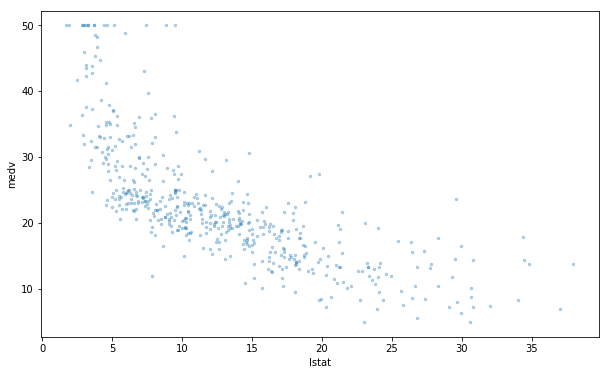

In [66]:
# plot lstat (% lower status of the population) against median value
# Doesn't look linear, does it?
plt.figure(figsize=(10, 6))
plt.scatter(df.lstat, df.medv, s=6, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

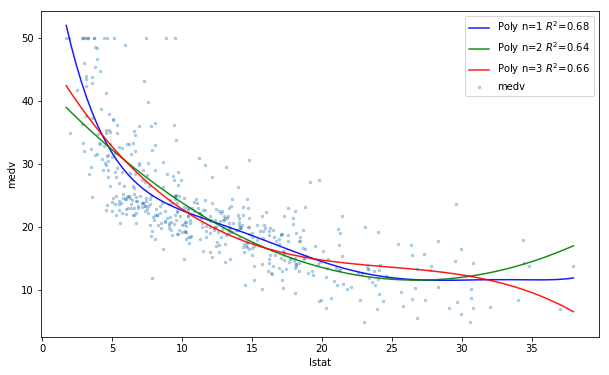

In [97]:
# Let's fit some lines to it!

# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(10, 6))
plt.scatter(df.lstat, df.medv, s=6, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

# points linearly space on lstat
x = pd.DataFrame({'lstat': np.linspace(df.lstat.min(), df.lstat.max(), 100)})

# 1st order polynomial
poly_1 = smf.ols(formula='medv ~ 1 + lstat + I(lstat**2)+ I(lstat**3)+ I(lstat**4)+ I(lstat**5)+ I(lstat**6)', data=df).fit()
plt.plot(x.lstat, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$={:.2f}'.format(poly_1.rsquared), 
         alpha=0.9)

# 2nd order polynomial
poly_2 = smf.ols(formula='medv ~ 1 + lstat + I(lstat**2)', data=df).fit()
plt.plot(x.lstat, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$={:.2f}'.format(poly_2.rsquared), 
         alpha=0.9)

# 3rd order polynomial
poly_3 = smf.ols(formula='medv ~ 1 + lstat + I(lstat**2)+I(lstat**3)', data=df).fit()
plt.plot(x.lstat, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$={:.2f}'.format(poly_3.rsquared))

plt.legend()

In [42]:
#Were our lines we fit needed? Should we stop at order 2 or 3?

In [98]:
poly_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 16 May 2017   Prob (F-statistic):          6.19e-121
Time:                        15:01:13   Log-Likelihood:                -1549.8
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     499   BIC:                             3143.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        73.0434      5.593     13.059      0.000      62.054      84.033
lstat           -15.1673      2.965     -5.115      0.000     -20.994      -9.341
I(lstat ** 2)     1.9296      0.571      3.378      0.001       0.807       3.052
I(lstat ** 3)    -0.1307      0.052     -2.513      0.012      -0.233      -0.029
I(lstat ** 4)     0.0047      0.002      1.947      0.052   -4.21e-05       0.009
I(lstat ** 5) -8.416e-05   5.45e-05     -1.544      0.123      -0.000    2.29e-05
I(lstat ** 6)  5.974e-07   4.78e-07      1.249      0.212   -3.42e-07    1.54e-06
==============================================================================
Omnibus:                      145.655   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              505.126
Skew:                           1.303   Prob(JB):                    2.06e-110
Kurtosis:                       7.143   Cond. No.                     7.44e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 16 May 2017   Prob (F-statistic):          1.56e-112
Time:                        13:23:57   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
poly_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Tue, 16 May 2017   Prob (F-statistic):          1.78e-116
Time:                        13:23:58   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        48.6496      1.435     33.909      0.000      45.831      51.468
lstat            -3.8656      0.329    -11.757      0.000      -4.512      -3.220
I(lstat ** 2)     0.1487      0.021      6.983      0.000       0.107       0.191
I(lstat ** 3)    -0.0020      0.000     -5.013      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      107.925   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.171
Skew:                           1.088   Prob(JB):                     8.69e-57
Kurtosis:                       5.741   Cond. No.                     5.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Let's revisit the bootstrap, just for funsies

In [74]:
def get_betas(X,y):
    beta0,beta1 = np.dot(np.linalg.inv(np.dot(X.T,X)),(np.dot(X.T,y)))
    return beta0,beta1

def bootstrap_df(df,y):
    indices = [random.choice(df.index) for _ in df.index]
    new_df= pd.DataFrame()
    new_y = []
    for element in indices:
        new_df = new_df.append(df.loc[element])
        new_y.append(y[element])
    return new_df,new_y

def bootstrap_betas(X,y,num_samples):
    return [get_betas(*bootstrap_df(X,y)) for _ in range(num_samples)]

In [75]:
bootstrapped_samples = bootstrap_betas(X,y,2500)

In [76]:
short_summary(est)

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,237.9273,37.410,6.360,0.000,164.381,311.473
"C(Married, Treatment(reference='Yes'))[T.No]",20.9546,41.926,0.500,0.617,-61.470,103.379
Income,6.0587,0.580,10.441,0.000,4.918,7.199


## The coefficient estimates from the bootstrap

In [77]:
print 'The coefficient estimate for GNP is\n {}'.format(np.mean([x[0] for x in bootstrapped_samples]))
print 'The coefficient estimate for GNP is\n {}'.format(np.mean([x[1] for x in bootstrapped_samples]))

The coefficient estimate for GNP is
 0.0349822950416
The coefficient estimate for GNP is
 51.7504151126


## Let's look at the 95% confidence intervals for our coefficients with bootstrapping

In [78]:
print 'GNP coefficient 95% confidence interval\n ({},{})'.format(np.percentile([x[0] for x in bootstrapped_samples],2.5), np.percentile([x[0] for x in bootstrapped_samples],97.5))
print 'Constant coefficient 95% confidence interval\n ({},{})'.format(np.percentile([x[1] for x in bootstrapped_samples],2.5), np.percentile([x[1] for x in bootstrapped_samples],97.5))

GNP coefficient 95% confidence interval
 (0.0326289626063,0.038602097127)
Constant coefficient 95% confidence interval
 (50.4700617517,52.6715457708)


## Examine the standard errors given by the bootstrap

In [79]:
print 'The standard error for GNP is\n {}'.format(np.std([x[0] for x in bootstrapped_samples]))
print 'The standard error for the constant is\n {}'.format(np.std([x[1] for x in bootstrapped_samples]))

The standard error for GNP is
 0.00152846766688
The standard error for the constant is
 0.55689409932


# Shameless R^2 Chasing Competition! Instructions: get the data, make a model. Highest R^2 wins! Winner gets to explain their features. Data: http://www-bcf.usc.edu/~gareth/ISL/Auto.csv